C:\Users\hd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 0, 3, 3, 3, 1, 2, 2, 2, 2, 2,
       3, 0, 3, 0, 3, 0, 2, 1, 3, 1, 0, 2, 0, 0, 3, 1, 3, 1, 0, 2, 1, 1,
       2, 1, 3, 0, 3, 3, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 3, 0,
       1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 3, 3, 3, 0, 3, 2, 0, 1,
       2, 0, 3, 2, 0, 1, 3, 2, 3, 0, 0, 3])

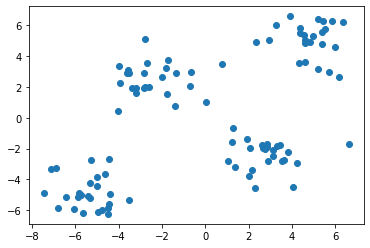

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(X[:,0],X[:,1])

#df = pd.read_csv('student_clustering.csv')

#X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=500)
km.fit_predict(X)

# plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
# plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
# plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
# plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
# plt.show()

In [3]:
pip install kmeans


Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\hd\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hd\\AppData\\Local\\Temp\\pip-install-gk8gwjlk\\kmeans_53cb92b148ad4361991f11cbec5759c0\\setup.py'"'"'; __file__='"'"'C:\\Users\\hd\\AppData\\Local\\Temp\\pip-install-gk8gwjlk\\kmeans_53cb92b148ad4361991f11cbec5759c0\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hd\AppData\Local\Temp\pip-wheel-clkt5u7o'
       cwd: C:\Users\hd\AppData\Local\Temp\pip-install-gk8gwjlk\kmeans_53cb92b148ad4361991f11cbec5759c0\
  Complete output (19 lines):
  running bdist_wheel
  running build
  running build_py
  creating build

  Running setup.py clean for kmeans
Failed to build kmeans
    Running setup.py install for kmeans: started
    Running setup.py install for kmeans: finished with status 'error'



  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\kmeans
  copying kmeans\performance.py -> build\lib.win-amd64-3.9\kmeans
  copying kmeans\tests.py -> build\lib.win-amd64-3.9\kmeans
  copying kmeans\__init__.py -> build\lib.win-amd64-3.9\kmeans
  running egg_info
  writing kmeans.egg-info\PKG-INFO
  writing dependency_links to kmeans.egg-info\dependency_links.txt
  writing top-level names to kmeans.egg-info\top_level.txt
  reading manifest file 'kmeans.egg-info\SOURCES.txt'
  writing manifest file 'kmeans.egg-info\SOURCES.txt'
  copying kmeans\lib.c -> build\lib.win-amd64-3.9\kmeans
  running build_ext
  building 'kmeans/lib' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel for kmeans
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\hd\anaconda3\py

In [9]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)